In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import openexplorer as oe
import numpy as np
from simtk import unit
from simtk.openmm import app
from tqdm import tqdm

/home/diego/MyMachine/locals/miniconda/envs/OpenExplorer/lib/python3.7/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


no need to add nglview patch


In [3]:
import matplotlib.pyplot as plt

# Monte Carlo-minimization

Li, Zhenqin, and Harold A. Scheraga. "Monte Carlo-minimization approach to the multiple-minima problem in protein folding." Proceedings of the National Academy of Sciences 84, no. 19 (1987): 6611-6615.

In [4]:
modeller = msm.convert('metenkephalin.pdb', to_form='openmm.Modeller')

topology = modeller.topology
positions = modeller.positions

forcefield = app.ForceField('amber10.xml')
system = forcefield.createSystem(topology, nonbondedMethod=app.NoCutoff)

NotImplementedConversionError: The conversion from file:pdb to openmm.Modeller has not been implemeted yet. Write a new issue in https://github.com/uibcdf/MolSysMT/issues asking for it.

In [5]:
explorer = oe.Explorer(topology, system, platform='CUDA')

In [6]:
explorer.set_coordinates(positions)

In [7]:
exploration_campaign = oe.exploration_campaign.MonteCarloMinimization(explorer)

In [8]:
exploration_campaign.run(2500, tqdm=True)

TypeError: run() got an unexpected keyword argument 'tqdm'

In [12]:
exploration_campaign.acceptance.n_accepted

1318

In [13]:
exploration_campaign.pes.n_minima

556

In [14]:
exploration_campaign.pes.global_minimum_potential_energy

Quantity(value=-654.2699918371322, unit=kilojoule/mole)

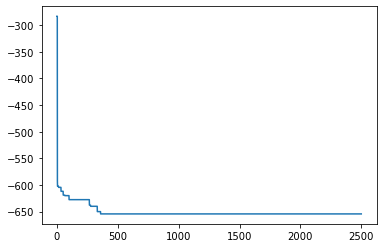

In [15]:
plt.plot(exploration_campaign.global_minimum_potential_energies._value)